# Full Dirichlet VPINN example

In [1]:
from MeshLib import MeshLib as ml

from VPINN_tri_final import *

from PROBDEF import PROBDEF

import os; os.environ['CUDA_VISIBLE_DEVICES'] = '-1'
import logging; logging.getLogger('tensorflow').setLevel(logging.ERROR)

tfk = tf.keras
tfkl = tf.keras.layers

# importing probdef 
pb = PROBDEF()

2023-12-07 18:44:27.581009: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-12-07 18:44:27.597902: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-07 18:44:27.798591: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-07 18:44:27.800091: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-07 18:44:28.742183: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Co


my_types lib imported

MeshLib imported

generate mesh lib imported

interpolator_lib imported

settings_lib imported 




### Initialise mesh

In [2]:
# seed for reproducibility
initializer = tf.keras.initializers.GlorotUniform(seed=54)


# mesh init
domain = ((0, 0), (1, 0), (1, 1), (0, 1))
#mesh = generate_mesh(domain, 0.01)

### Train boundary condition network

In [3]:
#net used for approximating the fully dirichlet bc  
bc_model = tfk.models.Sequential()
bc_model.add(tf.keras.Input(shape=(2,),dtype=tf_type))
bc_model.add(tfkl.Dense(10, activation='tanh',kernel_initializer=initializer,dtype=tf_type,bias_initializer=initializer))
bc_model.add(tfkl.Dense(10, activation='tanh',kernel_initializer=initializer,dtype=tf_type,bias_initializer=initializer))
bc_model.add(tfkl.Dense(10, activation='tanh',kernel_initializer=initializer,dtype=tf_type,bias_initializer=initializer))
bc_model.add(tfkl.Dense(10, activation='tanh',kernel_initializer=initializer,dtype=tf_type,bias_initializer=initializer))
bc_model.add(tf.keras.layers.Dense(1,activation='linear',kernel_initializer=initializer,dtype=tf_type,use_bias=True))

In [4]:
print(bc_model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                30        
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
 dense_2 (Dense)             (None, 10)                110       
                                                                 
 dense_3 (Dense)             (None, 10)                110       
                                                                 
 dense_4 (Dense)             (None, 1)                 11        
                                                                 
Total params: 371 (2.90 KB)
Trainable params: 371 (2.90 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [5]:
# setting model to the current net
model = bc_model


# helper function to treat the net as a lamda function
def model_np(x, y):
    eval = tf.constant([[x, y]], dtype=tf.float64)
    return model(eval).numpy()[0, 0]

In [6]:
def plot_BC(u_exact, u_NN_BC_):
    """both numpy functions"""
    x = np.linspace(0, 1, 200, dtype=np.float64)

    eval_exact = [u_exact(x[i], 1.0) for i in range(len(x))]

    eval_net = [u_NN_BC_(x[i], 1.0) for i in range(len(x))]

    eval_exact = np.array(eval_exact)
    eval_net = np.array(eval_net)

    plt.figure(figsize=(10,7))  # Set the figure size

    # Plot the data
    plt.subplot(221)   
    plt.plot(x, eval_net, label="eval_net", linestyle="-", marker="o", color="b", markersize=2)
    plt.plot(x, eval_exact, label="eval_exact", linestyle="--", marker="x", color="r", markersize=2)
    plt.grid()
    plt.title("top edge")
    plt.legend()

    eval_exact = [u_exact(x[i], 0.0) for i in range(len(x))]
    eval_net = [u_NN_BC_(x[i], 0.0) for i in range(len(x))]
    eval_exact = np.array(eval_exact)
    eval_net = np.array(eval_net)

    # plt.figure(figsize=(8, 6))  # Set the figure size

    # Plot the data
    plt.subplot(223)    
    plt.plot(x, eval_net, label="eval_net", linestyle="-", marker="o", color="b", markersize=2)
    plt.plot(x, eval_exact, label="eval_exact", linestyle="--", marker="x", color="r", markersize=2)
    plt.grid()
    plt.title("bottom edge")
    plt.legend()

    eval_exact = [u_exact(1.0, x[i]) for i in range(len(x))]
    eval_net = [u_NN_BC_(1.0, x[i]) for i in range(len(x))]
    eval_exact = np.array(eval_exact)
    eval_net = np.array(eval_net)

    # plt.figure(figsize=(8, 6))  # Set the figure size

    # Plot the data
    plt.subplot(222)    
    plt.plot(x, eval_net, label="eval_net", linestyle="-", marker="o", color="b", markersize=2)
    plt.plot(x, eval_exact, label="eval_exact", linestyle="--", marker="x", color="r", markersize=2)
    plt.grid()
    plt.title("right edge")
    plt.legend()

    eval_exact = [u_exact(0.0, x[i]) for i in range(len(x))]
    eval_net = [u_NN_BC_(0.0, x[i]) for i in range(len(x))]
    eval_exact = np.array(eval_exact)
    eval_net = np.array(eval_net)

    # plt.figure(figsize=(8, 6))  # Set the figure size

    # Plot the data
    plt.subplot(224)   
    plt.plot(x, eval_net, label="eval_net", linestyle="-", marker="o", color="b", markersize=2)
    plt.plot(x, eval_exact, label="eval_exact", linestyle="--", marker="x", color="r", markersize=2)
    plt.grid()
    plt.title("left edge")
    plt.legend()

    eval_exact = [u_exact(x[i], 0.5) for i in range(len(x))]
    eval_net = [u_NN_BC_(x[i], 0.5) for i in range(len(x))]
    eval_exact = np.array(eval_exact)
    eval_net = np.array(eval_net)

    plt.figure(figsize=(10, 7))  # Set the figure size

    # Plot the data
    plt.subplot(221)
    plt.plot(x, eval_net, label="eval_net", linestyle="-", marker="o", color="b", markersize=2)
    plt.plot(x, eval_exact, label="eval_exact", linestyle="--", marker="x", color="r", markersize=2)
    plt.grid()
    plt.title("slice in the middle y=0.5")
    plt.legend()

    eval_exact = [u_exact(x[i], 0.25) for i in range(len(x))]
    eval_net = [u_NN_BC_(x[i], 0.25) for i in range(len(x))]
    eval_exact = np.array(eval_exact)
    eval_net = np.array(eval_net)

    # plt.figure(figsize=(8, 6))  # Set the figure size

    # Plot the data
    plt.subplot(222)
    plt.plot(x, eval_net, label="eval_net", linestyle="-", marker="o", color="b", markersize=2)
    plt.plot(x, eval_exact, label="eval_exact", linestyle="--", marker="x", color="r", markersize=2)
    plt.grid()
    plt.title("slice in the middle y=0.25")
    plt.legend()

    eval_exact = [u_exact(x[i], 0.75) for i in range(len(x))]
    eval_net = [u_NN_BC_(x[i], 0.75) for i in range(len(x))]
    eval_exact = np.array(eval_exact)
    eval_net = np.array(eval_net)

    # plt.figure(figsize=(8, 6))  # Set the figure size

    # Plot the data
    plt.subplot(223)
    plt.plot(x, eval_net, label="eval_net", linestyle="-", marker="o", color="b", markersize=2)
    plt.plot(x, eval_exact, label="eval_exact", linestyle="--", marker="x", color="r", markersize=2)
    plt.grid()
    plt.title("slice in the middle y=0.75")
    plt.legend()

    eval_exact = [u_exact(0.5, x[i]) for i in range(len(x))]
    eval_net = [u_NN_BC_(0.5, x[i]) for i in range(len(x))]
    eval_exact = np.array(eval_exact)
    eval_net = np.array(eval_net)

    # plt.figure(figsize=(8, 6))  # Set the figure size

    # Plot the data
    plt.subplot(224)
    plt.plot(x, eval_net, label="eval_net", linestyle="-", marker="o", color="b", markersize=2)
    plt.plot(x, eval_exact, label="eval_exact", linestyle="--", marker="x", color="r", markersize=2)
    plt.grid()
    plt.title("slice in the middle x=0.50")
    plt.legend()

def helper_colour_plot(x, y, model):

    x_=tf.reshape(x,(-1,1))
    y_=tf.reshape(y,(-1,1))

    eval=tf.concat([x_,y_],axis=1)

    return tf.reshape(model(eval),(tf.shape(x)[0],-1))

def color_plot(model):

    x = np.linspace(0, 1, 1000)
    y = np.linspace(0, 1, 1000)

    X, Y = np.meshgrid(x, y)

    error = np.abs(pb.u_exact_np(X,Y)-helper_colour_plot(X,Y,model))

    fig=plt.imshow(
        error,
        extent=[min(x), max(x), min(y), max(y)],
        vmin=np.min(error),
        vmax=np.max(error)
    )

    plt.title('Error Map')
    plt.colorbar(fig)

    fig.axes.set_autoscale_on(False)

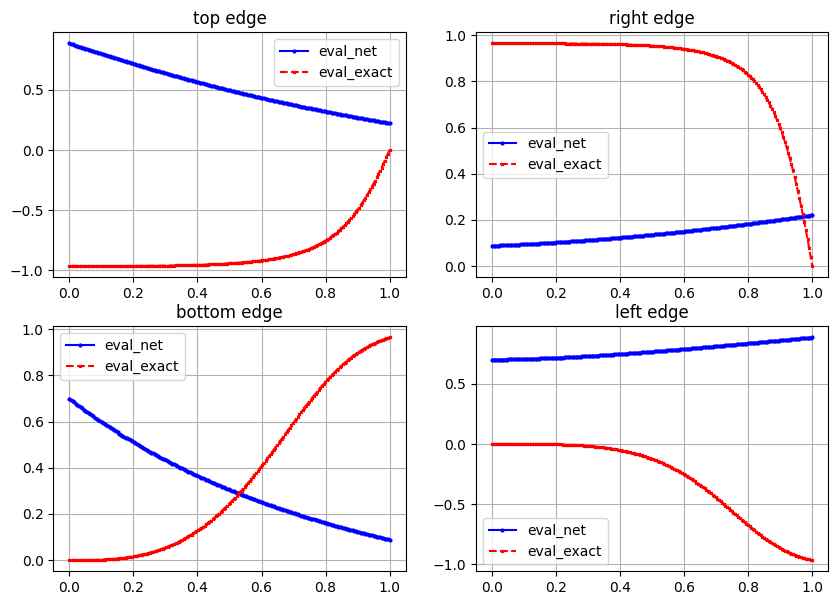

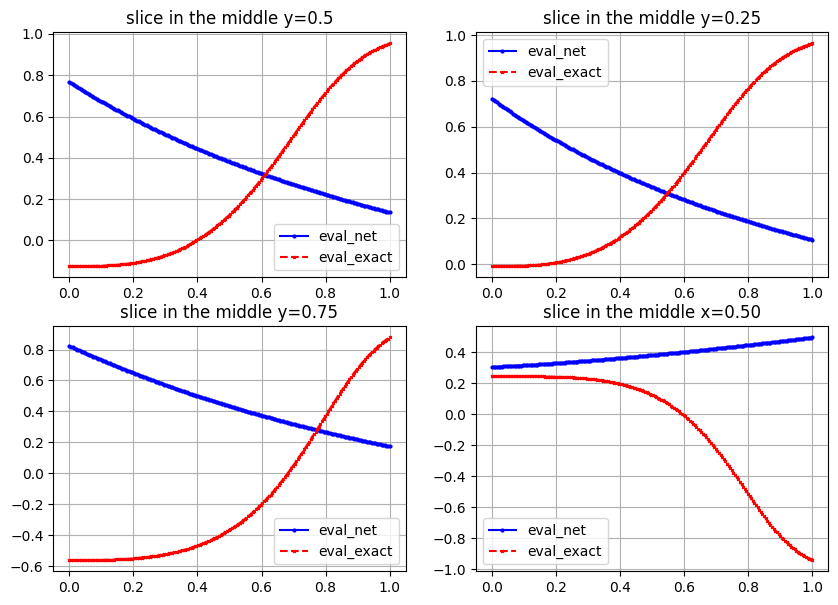

In [7]:
# Compare untrained model to the exact version
plot_BC(pb.u_exact_np,model_np)

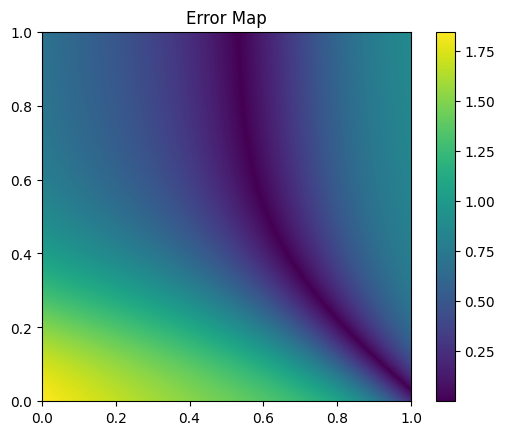

In [8]:
color_plot(bc_model)

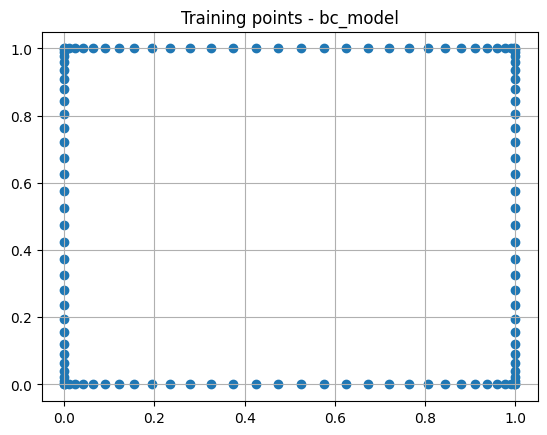

In [9]:
# Generate training data for the network
x = pb.generate_boundary_points(30, False)
plt.scatter(x[:, 0], x[:, 1])
plt.title("Training points - bc_model")
plt.grid()

y = pb.u_exact(x[:, 0], x[:, 1])
y = tf.reshape(y, (-1, 1))

In [10]:
# Training process of bc_model with the MSE as loss function 
custom_optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)  # Adjust the learning rate as needed
bc_model.compile(optimizer=custom_optimizer, loss='mean_squared_error')

history=model.fit(x, y, epochs=3000, batch_size=np.size(y))

Epoch 1/3000


1/1 [==============================] - 1s 620ms/step - loss: 1.0634
Epoch 2/3000
1/1 [==============================] - 0s 3ms/step - loss: 1.0161
Epoch 3/3000
1/1 [==============================] - 0s 3ms/step - loss: 0.9720
Epoch 4/3000
1/1 [==============================] - 0s 2ms/step - loss: 0.9312
Epoch 5/3000
1/1 [==============================] - 0s 3ms/step - loss: 0.8936
Epoch 6/3000
1/1 [==============================] - 0s 3ms/step - loss: 0.8591
Epoch 7/3000
1/1 [==============================] - 0s 2ms/step - loss: 0.8275
Epoch 8/3000
1/1 [==============================] - 0s 2ms/step - loss: 0.7985
Epoch 9/3000
1/1 [==============================] - 0s 3ms/step - loss: 0.7718
Epoch 10/3000
1/1 [==============================] - 0s 4ms/step - loss: 0.7472
Epoch 11/3000
1/1 [==============================] - 0s 3ms/step - loss: 0.7243
Epoch 12/3000
1/1 [==============================] - 0s 3ms/step - loss: 0.7029
Epoch 13/3000
1/1 [==============================] - 0s 2ms/

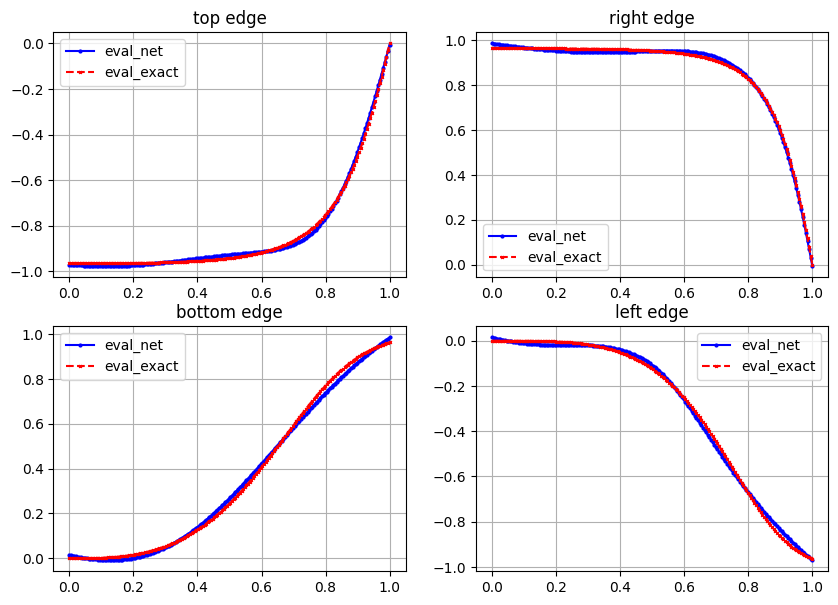

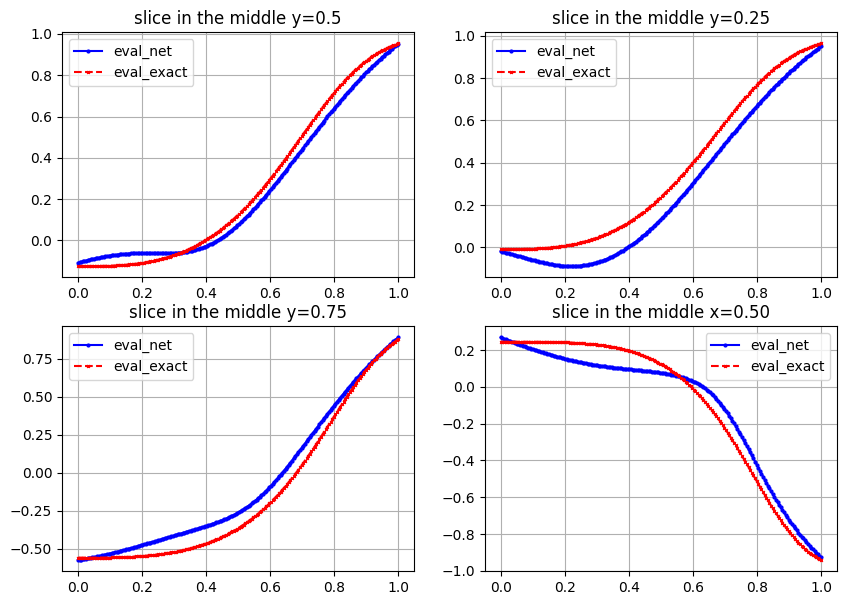

In [11]:
# Compare with the now trained network
plot_BC(pb.u_exact_np,model_np)

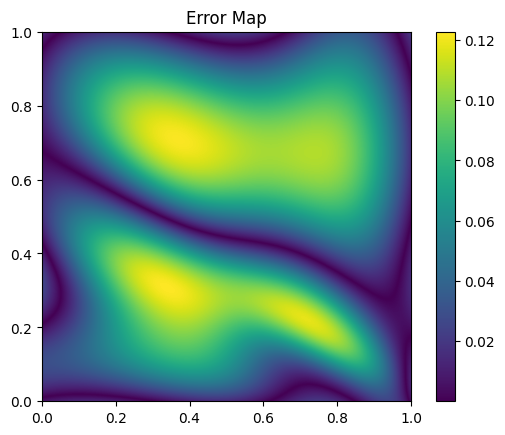

In [12]:
color_plot(bc_model)

In [13]:
# Make the bc_model non-trianable
for layer in bc_model.layers:
    layer.trainable = False

# Display model summary after making weights non-trainable
bc_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                30        
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
 dense_2 (Dense)             (None, 10)                110       
                                                                 
 dense_3 (Dense)             (None, 10)                110       
                                                                 
 dense_4 (Dense)             (None, 1)                 11        
                                                                 
Total params: 371 (2.90 KB)
Trainable params: 0 (0.00 Byte)
Non-trainable params: 371 (2.90 KB)
_________________________________________________________________


###  VPINN MODEL

In [14]:
# Create the network to be trained on the variational form
MODEL = tfk.models.Sequential()
MODEL.add(tf.keras.Input(shape=(2,),dtype=tf_type))
MODEL.add(tfkl.Dense(50, activation='tanh',kernel_initializer=initializer,dtype=tf_type,bias_initializer=initializer))
MODEL.add(tfkl.Dense(50, activation='tanh',kernel_initializer=initializer,dtype=tf_type,bias_initializer=initializer))
MODEL.add(tfkl.Dense(50, activation='tanh',kernel_initializer=initializer,dtype=tf_type,bias_initializer=initializer))
MODEL.add(tf.keras.layers.Dense(1,activation='linear',kernel_initializer=initializer,dtype=tf_type,use_bias=True))

MODEL.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 50)                150       
                                                                 
 dense_6 (Dense)             (None, 50)                2550      
                                                                 
 dense_7 (Dense)             (None, 50)                2550      
                                                                 
 dense_8 (Dense)             (None, 1)                 51        
                                                                 
Total params: 5301 (41.41 KB)
Trainable params: 5301 (41.41 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


#### Problem parameters

In [15]:
# order of test function 
N_test = 2

params = {'scheme': 'VPINNs','N_test':N_test}



In [16]:
# Initialise VPINN class
vp=VPINN(pb,params,mesh,True,NN=MODEL)
model=vp.u_NN_BC
vp.set_bc_model(bc_model)

NameError: name 'mesh' is not defined

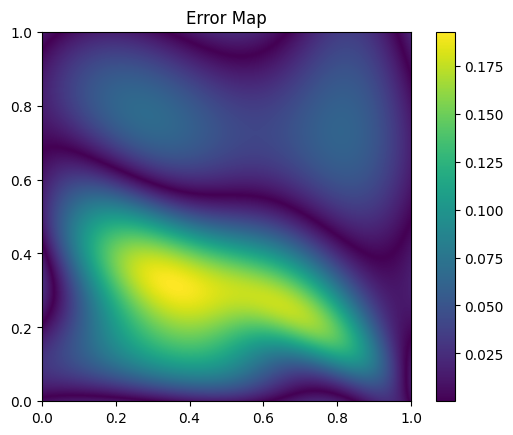

In [ ]:
vp.set_bc_model(bc_model)
color_plot(vp.NN_imposeBC)

In [ ]:
# Start training
history=vp.train(2000,0.001,bc_model)

Iteration: 0 loss: 0.0018474220 time: 25.40230703353882
Iteration: 10 loss: 0.0016860622 time: 0.0807194709777832
Iteration: 20 loss: 0.0015391566 time: 0.07748723030090332
Iteration: 30 loss: 0.0013834605 time: 0.08289957046508789
Iteration: 40 loss: 0.0012552850 time: 0.08091521263122559
Iteration: 50 loss: 0.0012147985 time: 0.07736539840698242
Iteration: 60 loss: 0.0012106187 time: 0.08060693740844727
Iteration: 70 loss: 0.0011932774 time: 0.07948660850524902
Iteration: 80 loss: 0.0011755955 time: 0.07777571678161621
Iteration: 90 loss: 0.0011485152 time: 0.07753229141235352
Iteration: 100 loss: 0.0011024683 time: 0.07969307899475098
Iteration: 110 loss: 0.0010254999 time: 0.10712265968322754
Iteration: 120 loss: 0.0009167726 time: 0.10903596878051758
Iteration: 130 loss: 0.0008191044 time: 0.11032462120056152
Iteration: 140 loss: 0.0007823468 time: 0.10908269882202148
Iteration: 150 loss: 0.0007648921 time: 0.10521483421325684
Iteration: 160 loss: 0.0007517971 time: 0.104296207427

## Analysis

### Loss

In [ ]:
def plot_loss(history):  
    iterations = range(0, len(history) * 10, 10)  # Assuming losses are provided every 10 iterations

    plt.figure(figsize=(10, 10))

    plt.subplot(211)
    plt.plot(iterations, history, marker='*',color='green',linewidth=1)
    plt.title('Loss Function Over Iterations')
    plt.xlabel('Iterations')
    plt.ylabel('Loss')
    plt.grid()

    plt.subplot(212)
    plt.semilogy(iterations, history,linewidth=1)
    plt.title('Loss Function Over Iterations (semilog scale)')
    plt.xlabel('Iterations')
    plt.ylabel('Loss')
    plt.grid()

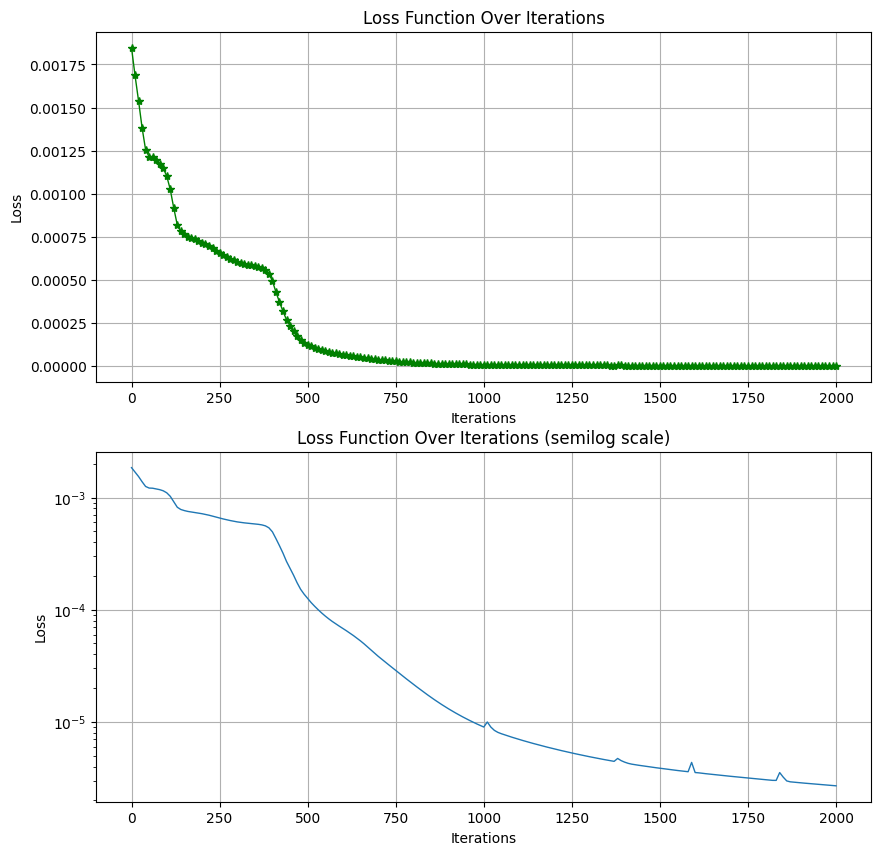

In [ ]:
plot_loss(history)

### Prediction

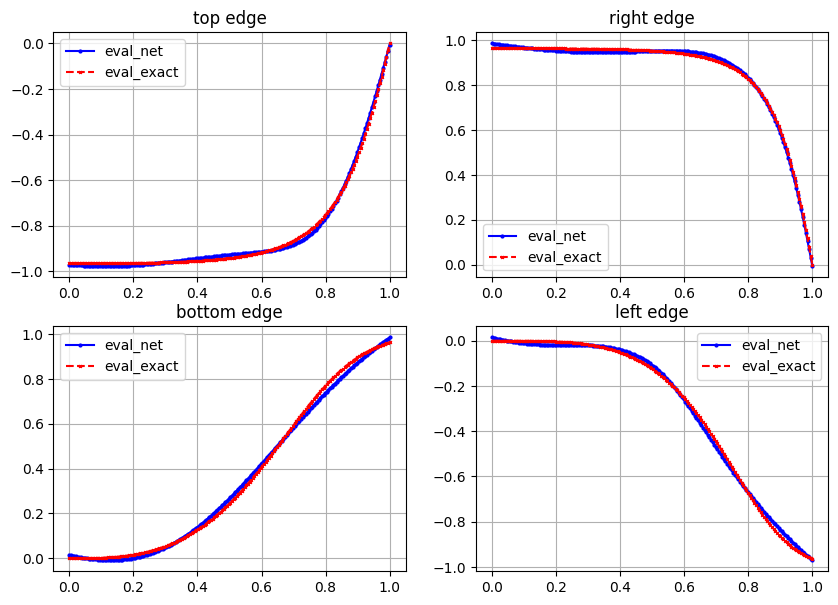

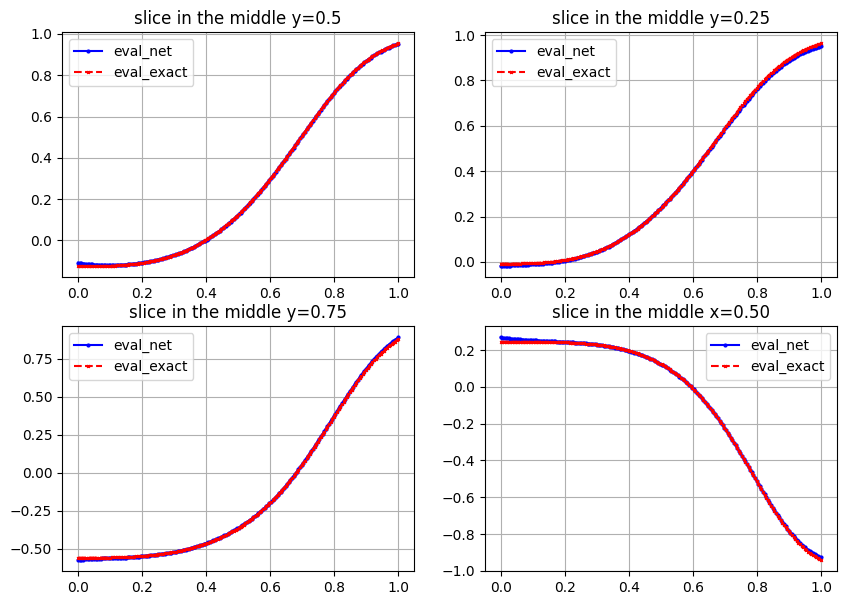

In [ ]:
plot_BC(pb.u_exact_np,vp.u_NN_BC)

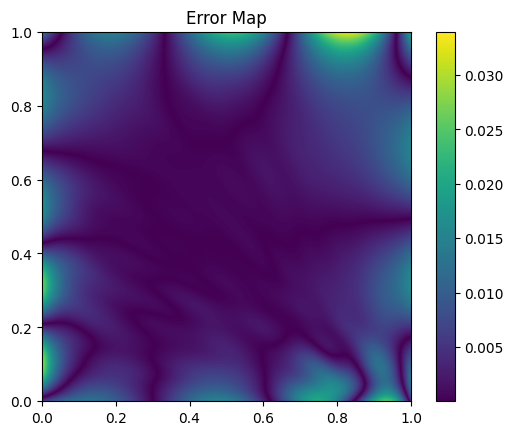

In [ ]:
color_plot(vp.NN_imposeBC)

### Residuals

In [ ]:
# Find the residuals over vertices and edges
if N_test == 1:
    residual_ending_vertices = vp.calc_residuals()   # r = 1 case
    vp.residual_summary(residual_ending_vertices)   # r = 1 case
elif N_test == 2:
    residual_ending_vertices, residual_ending_edges = vp.calc_residuals()  # r = 2
    vp.residual_summary(residual_ending_vertices,residual_ending_edges)  # r = 2


residual of vertices : 
-->max  =  0.0001552686906787108
-->min  =  3.802920282492395e-12
-->mean =  5.183772142993419e-06
residual of edges : 
-->max  =  2.1710594886166065e-05
-->min  =  3.178955715952418e-12
-->mean =  1.93970633418584e-06


/tmp/ipykernel_4564/659253298.py:20: DeprecationWarning: `interp2d` is deprecated!
`interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.13.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  f = sp.interp2d(x, y, residual_ending_vertices, kind="linear")
/home/mariano/Documenti/test/base/lib/python3.9/site-packages/scipy/interpolate/_fitpack_impl.py:593: RuntimeWarning: No more knots can be added because the number of B-spline
coefficients already exceeds the number of data points m.
Probable causes: either s or m too small. (fp>s)
	kx,ky=1,1 nx,ny=13,11 m=88 fp=0.000000 s=0.000000
  warnings.warn(RuntimeWarning(_iermess

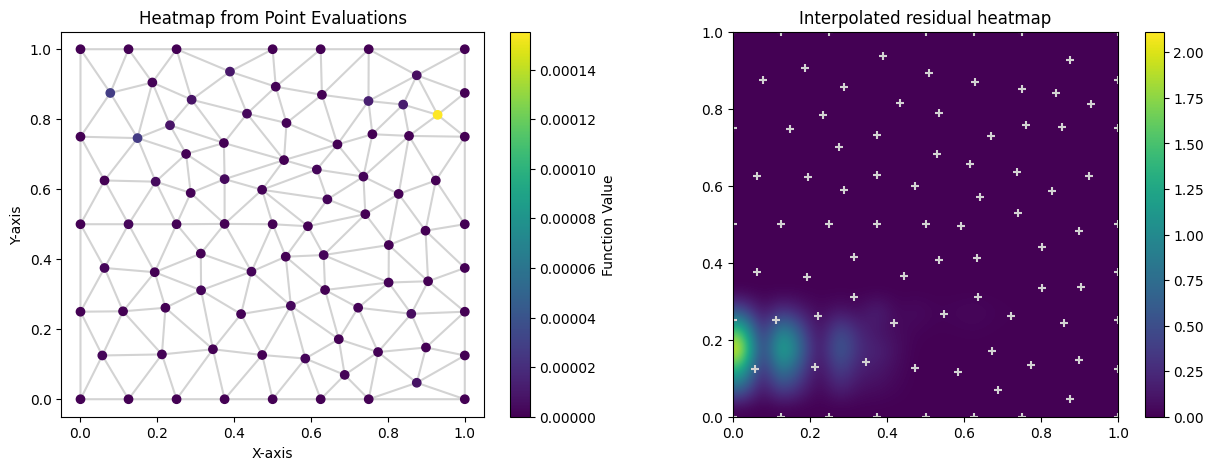

In [ ]:
x = vp.mesh['vertices'][:,0]
y = vp.mesh['vertices'][:,1]

plt.figure(figsize=(15, 5))

plt.subplot(121)
plt.triplot(
    x,
    y, color='lightgrey'
)
scatter = plt.scatter(x, y, c=residual_ending_vertices, cmap='viridis', marker='o')

plt.colorbar(scatter, label='Function Value')
plt.title('Heatmap from Point Evaluations')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')

import scipy.interpolate as sp

f = sp.interp2d(x, y, residual_ending_vertices, kind="linear")

# from pylab import figure, cm
from matplotlib.colors import LogNorm

x_coords = np.linspace(0, 1, 20)
z_coords = np.linspace(0, 1, 20)
c_i = np.abs(f(x_coords, z_coords))

plt.subplot(122)
fig = plt.imshow(
    c_i,
    extent=[min(x), max(x), min(y), max(y)],
    origin="lower",
    interpolation="bicubic",
    # norm=LogNorm(vmin = np.min(c_i), vmax=np.max(c_i))
)
plt.title('Interpolated residual heatmap')
plt.scatter(x, y, color='lightgrey', marker='+')
plt.colorbar(fig)

### H1 and L2 error

In [ ]:
# Get quad pairs
from numpy.polynomial import legendre


def get_quad_rule(n: int):
    # Degree of the Legendre polynomial (number of nodes - 1)

    # Nodes and weights for Gauss-Legendre quadrature
    nodes, weights = legendre.leggauss(n + 1)



    nodes=(nodes+1.0)/2.0


    # Nodes=np.array([nodes],dtype=np_type)

    Weights=np.array([weights],dtype=np_type)
    w = Weights.T @ Weights
    w = np.reshape(w, (-1,1))


    x, y =np.meshgrid(nodes,nodes)


    x = x.flatten()
    y = y.flatten()
 



    xy=np.array([x,y]).T


    return xy, w/4




In [ ]:
def L2_error(xy, w):
    
    u_NN = vp.NN_imposeBC(xy)

    # Find the exact solution
    u_ex = pb.u_exact_np(xy[:,0], xy[:,1])
    u_ex = np.reshape(u_ex, (-1,1))

    integrand = (u_ex - u_NN)**2


    # Find the difference between exact and NN 
    # return (u_ex - u_NN)**2

    return np.sqrt(np.sum(w*integrand))



def semi_H1_error(xy, w):

    # Find the gradient of the exact solution
    grad_ex = np.array([pb.dudx(xy[:,0], xy[:,1]), pb.dudy(xy[:,0], xy[:,1])],dtype=np_type).T


    # Find the gradient of the NN solution
    grad_NN = vp.eval_grad_NN_BC(tf.constant(xy, dtype=tf_type))

    


    # Find the difference between exact and NN 
    pw_diff = grad_ex - grad_NN

    pw_diff = pw_diff*pw_diff


    # Return dx_error^2 + dy_error^2
    return np.sqrt(np.sum(np.sum(pw_diff,axis=1)*w))

### NETWORKS WITH EXACT BC

In [210]:
import os;
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'
import importlib

import VPINN_tri_final as VPINN_tri_final

import interpolator as interpolator

importlib.reload(VPINN_tri_final)

importlib.reload(interpolator)

from VPINN_tri_final import *
from interpolator import *

from MeshLib import MeshLib as ml


import PROBDEF

interpolator_lib imported



In [211]:
# seed for reproducibility
initializer = tf.keras.initializers.GlorotUniform(seed=100)


# mesh init
domain = ((0, 0), (1, 0), (1, 1), (0, 1))
#mesh = generate_mesh(domain, 0.01)

In [212]:
def plot_BC(u_exact, u_NN_BC_):
    """both numpy functions"""
    x = np.linspace(0, 1, 200, dtype=np.float64)

    eval_exact = [u_exact(x[i], 1.0) for i in range(len(x))]

    eval_net = [u_NN_BC_(x[i], 1.0) for i in range(len(x))]

    eval_exact = np.array(eval_exact)
    eval_net = np.array(eval_net)

    plt.figure(figsize=(10,7))  # Set the figure size

    # Plot the data
    plt.subplot(221)   
    plt.plot(x, eval_net, label="eval_net", linestyle="-", marker="o", color="b", markersize=2)
    plt.plot(x, eval_exact, label="eval_exact", linestyle="--", marker="x", color="r", markersize=2)
    plt.grid()
    plt.title("top edge")
    plt.legend()

    eval_exact = [u_exact(x[i], 0.0) for i in range(len(x))]
    eval_net = [u_NN_BC_(x[i], 0.0) for i in range(len(x))]
    eval_exact = np.array(eval_exact)
    eval_net = np.array(eval_net)

    # plt.figure(figsize=(8, 6))  # Set the figure size

    # Plot the data
    plt.subplot(223)    
    plt.plot(x, eval_net, label="eval_net", linestyle="-", marker="o", color="b", markersize=2)
    plt.plot(x, eval_exact, label="eval_exact", linestyle="--", marker="x", color="r", markersize=2)
    plt.grid()
    plt.title("bottom edge")
    plt.legend()

    eval_exact = [u_exact(1.0, x[i]) for i in range(len(x))]
    eval_net = [u_NN_BC_(1.0, x[i]) for i in range(len(x))]
    eval_exact = np.array(eval_exact)
    eval_net = np.array(eval_net)

    # plt.figure(figsize=(8, 6))  # Set the figure size

    # Plot the data
    plt.subplot(222)    
    plt.plot(x, eval_net, label="eval_net", linestyle="-", marker="o", color="b", markersize=2)
    plt.plot(x, eval_exact, label="eval_exact", linestyle="--", marker="x", color="r", markersize=2)
    plt.grid()
    plt.title("right edge")
    plt.legend()

    eval_exact = [u_exact(0.0, x[i]) for i in range(len(x))]
    eval_net = [u_NN_BC_(0.0, x[i]) for i in range(len(x))]
    eval_exact = np.array(eval_exact)
    eval_net = np.array(eval_net)

    # plt.figure(figsize=(8, 6))  # Set the figure size

    # Plot the data
    plt.subplot(224)   
    plt.plot(x, eval_net, label="eval_net", linestyle="-", marker="o", color="b", markersize=2)
    plt.plot(x, eval_exact, label="eval_exact", linestyle="--", marker="x", color="r", markersize=2)
    plt.grid()
    plt.title("left edge")
    plt.legend()

    eval_exact = [u_exact(x[i], 0.5) for i in range(len(x))]
    eval_net = [u_NN_BC_(x[i], 0.5) for i in range(len(x))]
    eval_exact = np.array(eval_exact)
    eval_net = np.array(eval_net)

    plt.figure(figsize=(10, 7))  # Set the figure size

    # Plot the data
    plt.subplot(221)
    plt.plot(x, eval_net, label="eval_net", linestyle="-", marker="o", color="b", markersize=2)
    plt.plot(x, eval_exact, label="eval_exact", linestyle="--", marker="x", color="r", markersize=2)
    plt.grid()
    plt.title("slice in the middle y=0.5")
    plt.legend()

    eval_exact = [u_exact(x[i], 0.25) for i in range(len(x))]
    eval_net = [u_NN_BC_(x[i], 0.25) for i in range(len(x))]
    eval_exact = np.array(eval_exact)
    eval_net = np.array(eval_net)

    # plt.figure(figsize=(8, 6))  # Set the figure size

    # Plot the data
    plt.subplot(222)
    plt.plot(x, eval_net, label="eval_net", linestyle="-", marker="o", color="b", markersize=2)
    plt.plot(x, eval_exact, label="eval_exact", linestyle="--", marker="x", color="r", markersize=2)
    plt.grid()
    plt.title("slice in the middle y=0.25")
    plt.legend()

    eval_exact = [u_exact(x[i], 0.75) for i in range(len(x))]
    eval_net = [u_NN_BC_(x[i], 0.75) for i in range(len(x))]
    eval_exact = np.array(eval_exact)
    eval_net = np.array(eval_net)

    # plt.figure(figsize=(8, 6))  # Set the figure size

    # Plot the data
    plt.subplot(223)
    plt.plot(x, eval_net, label="eval_net", linestyle="-", marker="o", color="b", markersize=2)
    plt.plot(x, eval_exact, label="eval_exact", linestyle="--", marker="x", color="r", markersize=2)
    plt.grid()
    plt.title("slice in the middle y=0.75")
    plt.legend()

    eval_exact = [u_exact(0.5, x[i]) for i in range(len(x))]
    eval_net = [u_NN_BC_(0.5, x[i]) for i in range(len(x))]
    eval_exact = np.array(eval_exact)
    eval_net = np.array(eval_net)

    # plt.figure(figsize=(8, 6))  # Set the figure size

    # Plot the data
    plt.subplot(224)
    plt.plot(x, eval_net, label="eval_net", linestyle="-", marker="o", color="b", markersize=2)
    plt.plot(x, eval_exact, label="eval_exact", linestyle="--", marker="x", color="r", markersize=2)
    plt.grid()
    plt.title("slice in the middle x=0.50")
    plt.legend()

def helper_colour_plot(x, y, model):

    x_=tf.reshape(x,(-1,1))
    y_=tf.reshape(y,(-1,1))

    eval=tf.concat([x_,y_],axis=1)

    return tf.reshape(model(eval),(tf.shape(x)[0],-1))

def color_plot(model):

    x = np.linspace(0, 1, 1000)
    y = np.linspace(0, 1, 1000)

    X, Y = np.meshgrid(x, y)

    error = np.abs(pb.u_exact_np(X,Y)-helper_colour_plot(X,Y,model))

    fig=plt.imshow(
        error,
        extent=[min(x), max(x), min(y), max(y)],
        vmin=np.min(error),
        vmax=np.max(error)
    )

    plt.title('Error Map')
    plt.colorbar(fig)

    fig.axes.set_autoscale_on(False)

In [213]:
MODEL = tfk.models.Sequential()
MODEL.add(tf.keras.Input(shape=(2,),dtype=tf_type))
MODEL.add(tfkl.Dense(50, activation='tanh',kernel_initializer=initializer,dtype=tf_type,bias_initializer=initializer))
MODEL.add(tfkl.Dense(50, activation='tanh',kernel_initializer=initializer,dtype=tf_type,bias_initializer=initializer))
MODEL.add(tfkl.Dense(50, activation='tanh',kernel_initializer=initializer,dtype=tf_type,bias_initializer=initializer))
MODEL.add(tfkl.Dense(50, activation='tanh',kernel_initializer=initializer,dtype=tf_type,bias_initializer=initializer))
MODEL.add(tfkl.Dense(50, activation='tanh',kernel_initializer=initializer,dtype=tf_type,bias_initializer=initializer))
MODEL.add(tf.keras.layers.Dense(1,activation='linear',kernel_initializer=initializer,dtype=tf_type,use_bias=True))

MODEL.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_74 (Dense)            (None, 50)                150       
                                                                 
 dense_75 (Dense)            (None, 50)                2550      
                                                                 
 dense_76 (Dense)            (None, 50)                2550      
                                                                 
 dense_77 (Dense)            (None, 50)                2550      
                                                                 
 dense_78 (Dense)            (None, 50)                2550      
                                                                 
 dense_79 (Dense)            (None, 1)                 51        
                                                                 
Total params: 10,401
Trainable params: 10,401
Non-tra

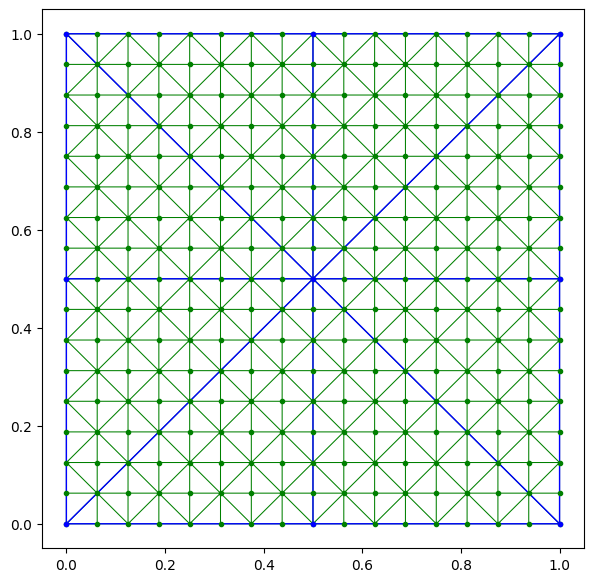

ratio =  8.0
h =  0.08838834764831845


In [255]:
mesh_chain = ml.generate_regular_mesh_chain(domain, depth=12, plot=False)
index=2
di = 5

ml.compare(mesh_chain[index], mesh_chain[index+di],False)

print('ratio = ',mesh_chain[index].h_max /mesh_chain[index+di].h_max)
print('h = ',mesh_chain[index+di].h_max)


In [215]:
coarse_mesh = mesh_chain[index]
fine_mesh = mesh_chain[index+di]

In [237]:
print(coarse_mesh.h_max)

1.4142135623730951


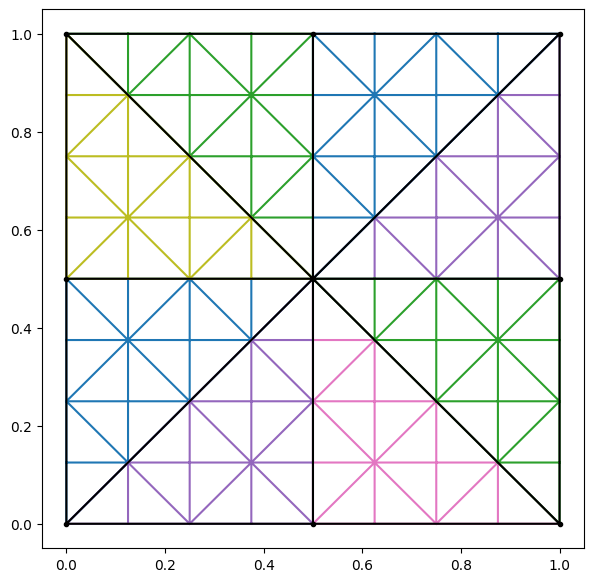

-->mesh : 
     n_triangles :  128
     n_vertices  :  81
     n_edges     :  208
     h_max           :  0.1767766952966369
     h_min           :  0.125
-->test_fun      : 
     order       :  2
     dof         :  225


In [216]:
N_test = 2
r_interpoaltion= 5

params = {'scheme': 'VPINNs','N_test':N_test,'r_interpolation':r_interpoaltion}
# importing probdef 
pb = PROBDEF.PROBDEF()
vp=VPINN(pb,params,fine_mesh,False,coarse_mesh,MODEL)
model=vp.u_NN_BC

In [217]:
# vp.helper()
# print(vp.x_to_eval_global)

In [218]:
# tf.reshape(vp.x_to_eval_global, (-1,2))

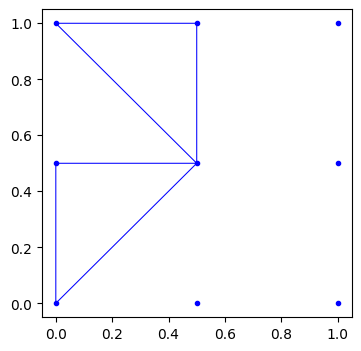

[5]


In [219]:
coarse_mesh.plot(triangles=[0,1])
print(list(range(5,6)))

In [220]:
vp.set_bc_model(vp.standard_bc)

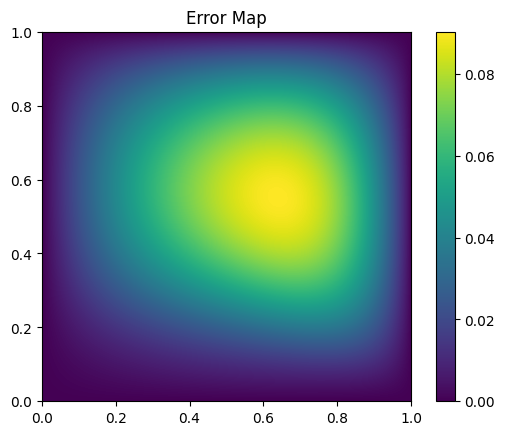

In [221]:
color_plot(vp.NN_imposeBC)

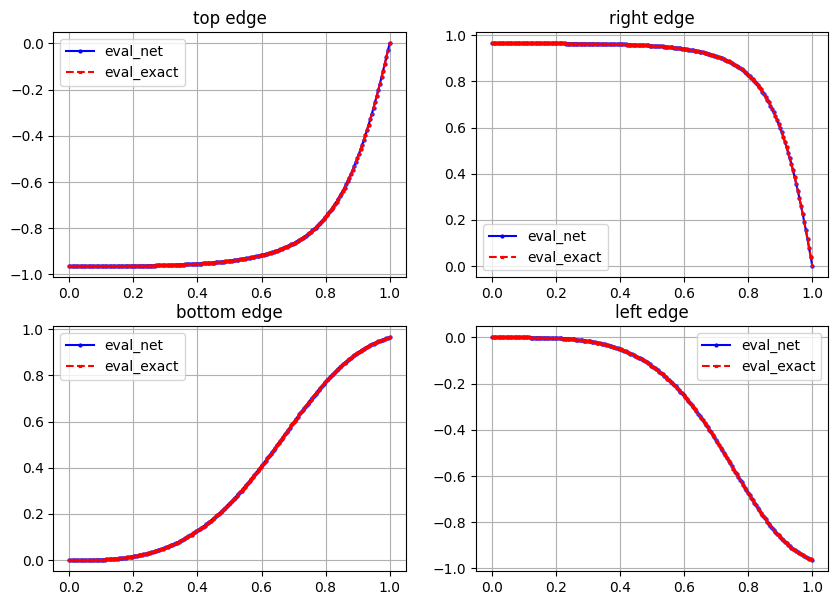

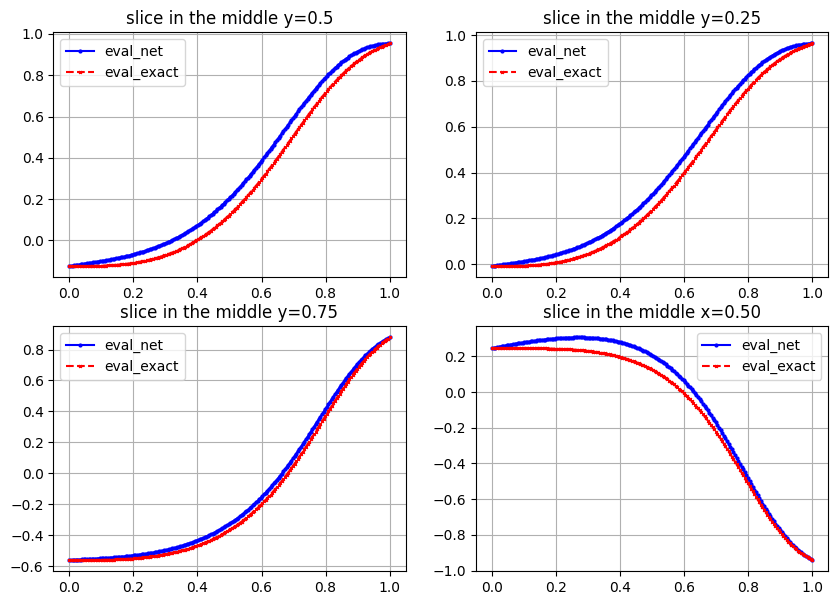

In [222]:
# helper function to treat the net as a lamda function
def model_np(x, y):
    eval = tf.constant([[x, y]], dtype=tf.float64)
    return model(eval).numpy()[0, 0]


model =vp.NN_imposeBC

plot_BC(pb.u_exact_np,model_np)

In [223]:
vp.helper()


vp.custom_loss_IVPINN()

# print(np.shape())

<tf.Tensor: shape=(), dtype=float64, numpy=0.0001628455828871583>

In [224]:
history=vp.train(3000,0.001)

Iteration: 0 loss: 0.0001628456 time: 103.1940758228302
Iteration: 10 loss: 0.0000946721 time: 0.25382208824157715
Iteration: 20 loss: 0.0000750626 time: 0.14017009735107422
Iteration: 30 loss: 0.0000691412 time: 0.13009929656982422
Iteration: 40 loss: 0.0000690709 time: 0.16609477996826172
Iteration: 50 loss: 0.0000681584 time: 0.1408395767211914
Iteration: 60 loss: 0.0000678157 time: 0.13112282752990723
Iteration: 70 loss: 0.0000673322 time: 0.15650415420532227
Iteration: 80 loss: 0.0000668401 time: 0.1358342170715332
Iteration: 90 loss: 0.0000662258 time: 0.13692569732666016
Iteration: 100 loss: 0.0000654636 time: 0.11518073081970215
Iteration: 110 loss: 0.0000644654 time: 0.11480093002319336
Iteration: 120 loss: 0.0000631709 time: 0.12301278114318848
Iteration: 130 loss: 0.0000615822 time: 0.10833930969238281
Iteration: 140 loss: 0.0000599741 time: 0.11042547225952148
Iteration: 150 loss: 0.0000589387 time: 0.13942885398864746
Iteration: 160 loss: 0.0000584001 time: 0.1502912044525

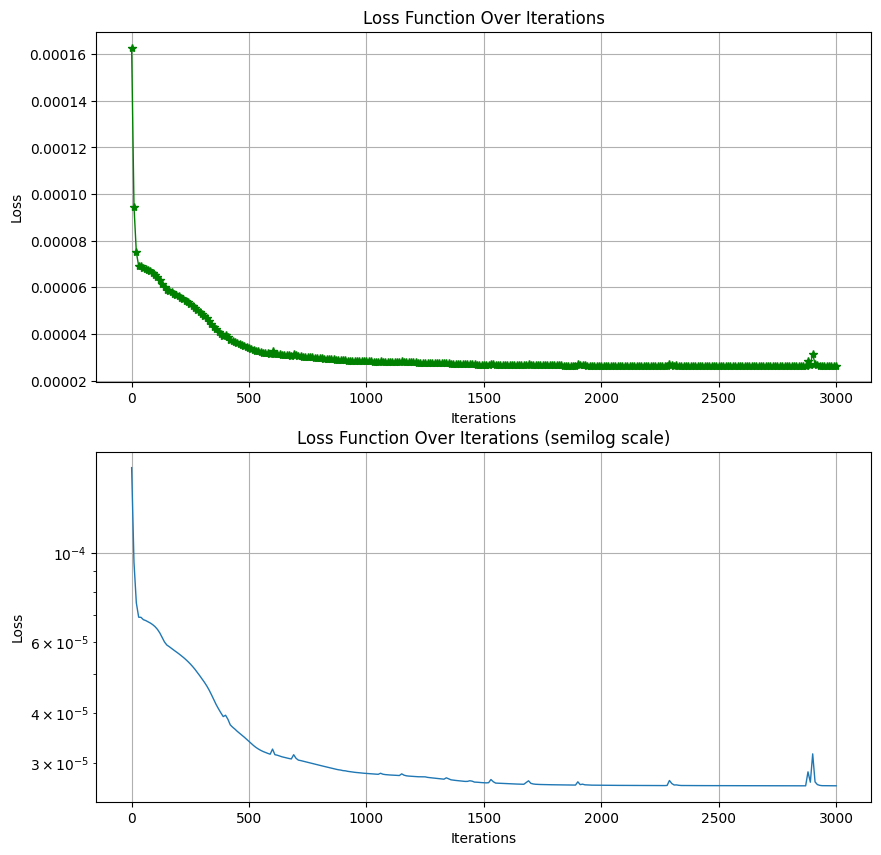

In [225]:
def plot_loss(history):  
    iterations = range(0, len(history) * 10, 10)  # Assuming losses are provided every 10 iterations

    plt.figure(figsize=(10, 10))

    plt.subplot(211)
    plt.plot(iterations, history, marker='*',color='green',linewidth=1)
    plt.title('Loss Function Over Iterations')
    plt.xlabel('Iterations')
    plt.ylabel('Loss')
    plt.grid()

    plt.subplot(212)
    plt.semilogy(iterations, history,linewidth=1)
    plt.title('Loss Function Over Iterations (semilog scale)')
    plt.xlabel('Iterations')
    plt.ylabel('Loss')
    plt.grid()
plot_loss(history)

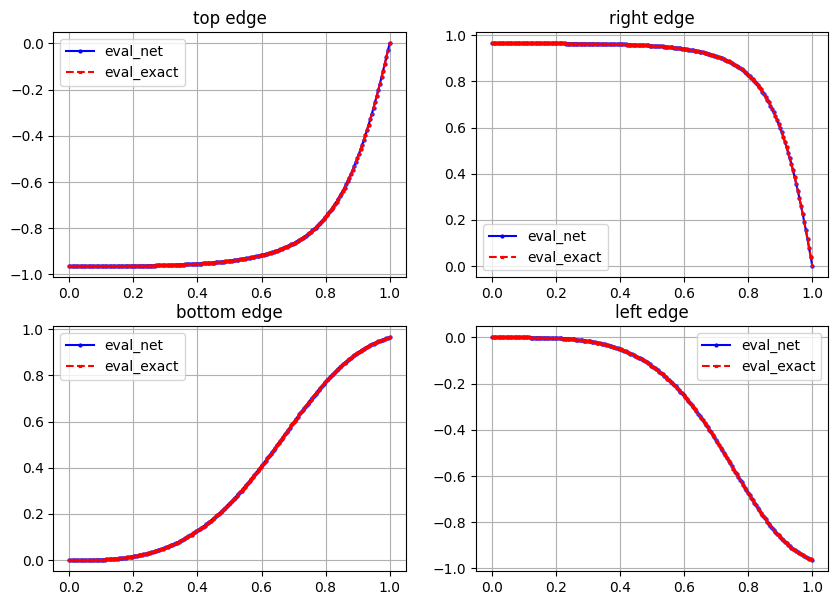

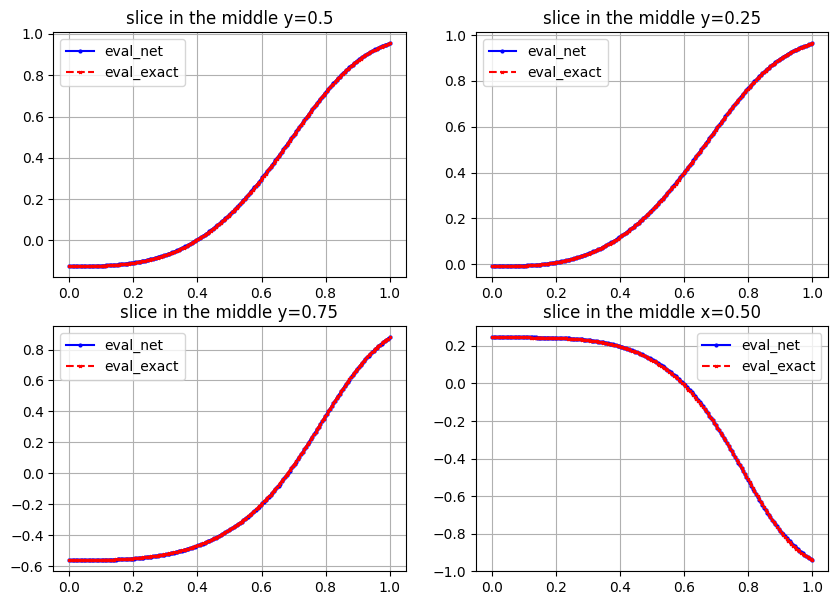

In [226]:
plot_BC(pb.u_exact_np,model_np)

In [227]:
print(type(vp.points))

<class 'numpy.ndarray'>


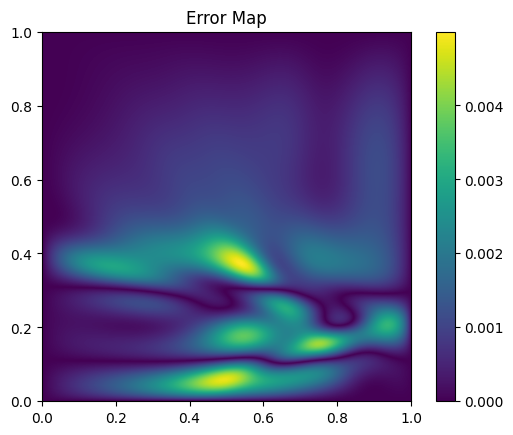

In [228]:
color_plot(vp.NN_imposeBC)

In [235]:
def L2_error(xy, w):
    
    u_NN = vp.NN_imposeBC(xy)

    # Find the exact solution
    u_ex = pb.u_exact_np(xy[:,0], xy[:,1])
    u_ex = np.reshape(u_ex, (-1,1))

    integrand = (u_ex - u_NN)**2


    # Find the difference between exact and NN 
    # return (u_ex - u_NN)**2

    return np.sqrt(np.sum(w*integrand))

def semi_H1_error(xy, w):

    # Find the gradient of the exact solution
    grad_ex = np.array([pb.dudx(xy[:,0], xy[:,1]), pb.dudy(xy[:,0], xy[:,1])],dtype=np_type).T


    # Find the gradient of the NN solution
    grad_NN = vp.eval_grad_NN_BC(tf.constant(xy, dtype=tf_type))

    


    # Find the difference between exact and NN 
    pw_diff = grad_ex - grad_NN

    pw_diff = tf.reduce_sum(tf.square(pw_diff),axis=1)

    pw_diff=tf.reshape(pw_diff,(-1,1))


    return np.sqrt(np.sum(pw_diff*w))

def semi_H1_error_lambda(x,y):
    xy=np.array([[x,y]],dtype=np_type)

    # Find the gradient of the exact solution
    grad_ex = np.array([pb.dudx(xy[:,0], xy[:,1]), pb.dudy(xy[:,0], xy[:,1])],dtype=np_type).T


    # Find the gradient of the NN solution
    grad_NN = vp.eval_grad_NN_BC(tf.constant(xy, dtype=tf_type))

    


    # Find the difference between exact and NN 
    pw_diff = grad_ex - grad_NN

    pw_diff = tf.reduce_sum(tf.square(pw_diff))

    return pw_diff.numpy()

#set quad rule for calc errors
xy, w = get_quad_rule(60)

semi_H1_err = semi_H1_error(xy, w)
L2_error_ = L2_error(xy, w)
H1_err = np.sqrt(L2_error_**2 + semi_H1_err**2)

print(f"L2 error: {L2_error_}")
print(f"semi H1 error: {semi_H1_err}")
print(f"H1 error: {H1_err}")

L2 error: 0.0012613204402685946
semi H1 error: 0.027958329156209678
H1 error: 0.027986766488110118


In [230]:
# from scipy.integrate import dblquad
# integral,error=dblquad(lambda x,y: (pb.u_exact(x,y)-vp.u_NN_BC(x,y))*(pb.u_exact(x,y)-vp.u_NN_BC(x,y)), 0.0, 1.0,0.0,1.0)


# print('dnlquad :')
# print(np.sqrt(integral))


### H1 and L2 convergence

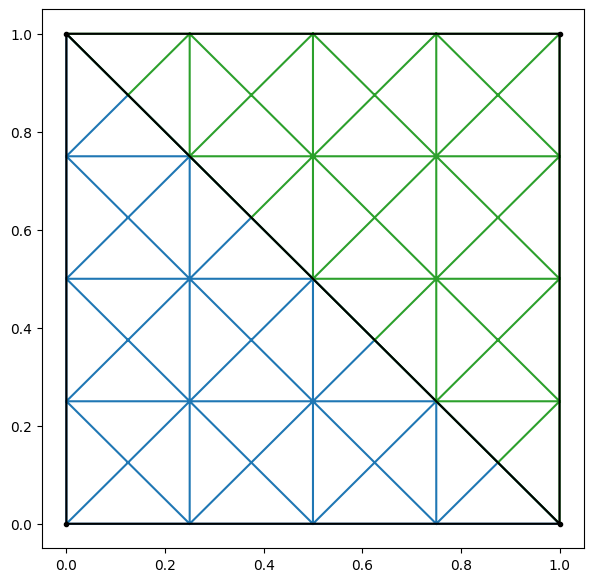

-->mesh : 
     n_triangles :  64
     n_vertices  :  41
     n_edges     :  104
     h_max           :  0.25
     h_min           :  0.1767766952966369
-->test_fun      : 
     order       :  2
     dof         :  113
Iteration: 0 loss: 0.0210990275 time: 47.667805194854736
Iteration: 10 loss: 0.0204280173 time: 0.08910799026489258
Iteration: 20 loss: 0.0203902891 time: 0.08309078216552734
Iteration: 30 loss: 0.0203021679 time: 0.08564877510070801
Iteration: 40 loss: 0.0202682485 time: 0.08504891395568848
Iteration: 50 loss: 0.0202482530 time: 0.08358573913574219
Iteration: 60 loss: 0.0202275698 time: 0.08832120895385742
Iteration: 70 loss: 0.0202075008 time: 0.08765792846679688
Iteration: 80 loss: 0.0201840508 time: 0.09102106094360352
Iteration: 90 loss: 0.0201515458 time: 0.09853816032409668
Iteration: 100 loss: 0.0201011836 time: 0.08957314491271973
Iteration: 110 loss: 0.0200177435 time: 0.09253144264221191
Iteration: 120 loss: 0.0198792702 time: 0.0915074348449707
Iteration: 130

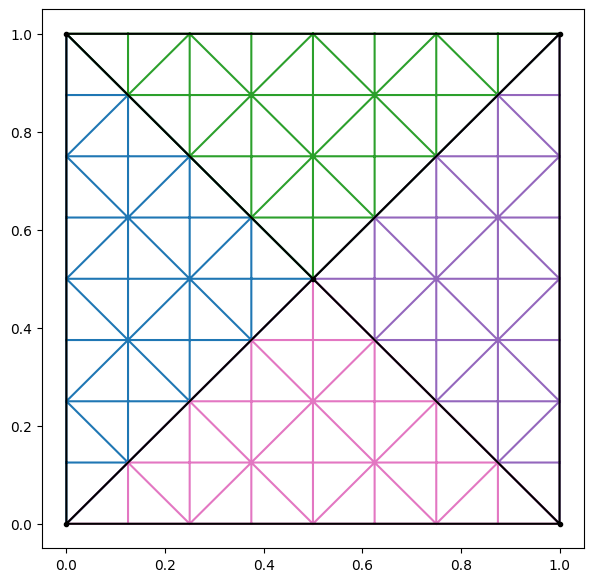

-->mesh : 
     n_triangles :  128
     n_vertices  :  81
     n_edges     :  208
     h_max           :  0.1767766952966369
     h_min           :  0.125
-->test_fun      : 
     order       :  2
     dof         :  225
Iteration: 0 loss: 0.0006796793 time: 54.4149010181427
Iteration: 10 loss: 0.0006545162 time: 0.12110066413879395
Iteration: 20 loss: 0.0006447922 time: 0.1141061782836914
Iteration: 30 loss: 0.0006419746 time: 0.11327886581420898
Iteration: 40 loss: 0.0006411467 time: 0.12497854232788086
Iteration: 50 loss: 0.0006403608 time: 0.12241888046264648
Iteration: 60 loss: 0.0006398871 time: 0.12101960182189941
Iteration: 70 loss: 0.0006396269 time: 0.11372160911560059
Iteration: 80 loss: 0.0006393917 time: 0.12640953063964844
Iteration: 90 loss: 0.0006391718 time: 0.1196279525756836
Iteration: 100 loss: 0.0006389494 time: 0.12353062629699707
Iteration: 110 loss: 0.0006387202 time: 0.10593867301940918
Iteration: 120 loss: 0.0006384793 time: 0.1001429557800293
Iteration: 130 l

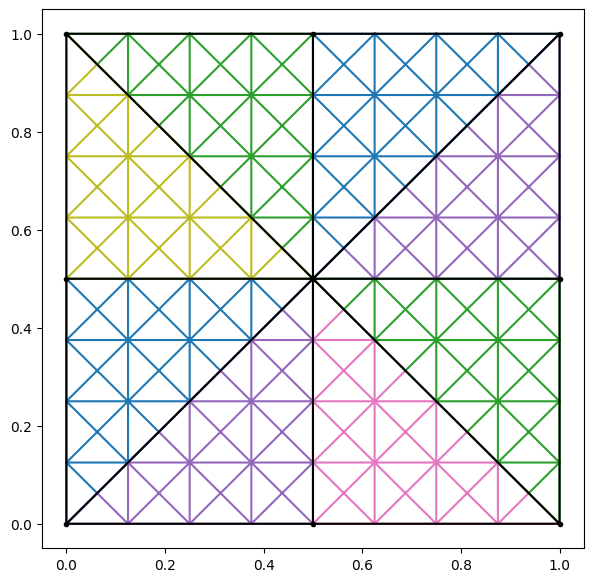

-->mesh : 
     n_triangles :  256
     n_vertices  :  145
     n_edges     :  400
     h_max           :  0.125
     h_min           :  0.08838834764831845
-->test_fun      : 
     order       :  2
     dof         :  481
Iteration: 0 loss: 0.0000437142 time: 107.52626490592957
Iteration: 10 loss: 0.0000378435 time: 0.17978119850158691
Iteration: 20 loss: 0.0000368864 time: 0.19070863723754883
Iteration: 30 loss: 0.0000356682 time: 0.18279290199279785
Iteration: 40 loss: 0.0000352660 time: 0.1932992935180664
Iteration: 50 loss: 0.0000351018 time: 0.1870427131652832
Iteration: 60 loss: 0.0000350341 time: 0.18766570091247559
Iteration: 70 loss: 0.0000349860 time: 0.19754815101623535
Iteration: 80 loss: 0.0000349399 time: 0.19253778457641602
Iteration: 90 loss: 0.0000349023 time: 0.19402670860290527
Iteration: 100 loss: 0.0000348693 time: 0.20895051956176758
Iteration: 110 loss: 0.0000348371 time: 0.18900752067565918
Iteration: 120 loss: 0.0000348047 time: 0.18473601341247559
Iteration: 

KeyboardInterrupt: 

In [254]:
def restart_model():
    model = tfk.models.Sequential()
    model.add(tf.keras.Input(shape=(2,),dtype=tf.float64))
    model.add(tfkl.Dense(50, activation='tanh',kernel_initializer=initializer,dtype=tf_type,bias_initializer=initializer))
    model.add(tfkl.Dense(50, activation='tanh',kernel_initializer=initializer,dtype=tf_type,bias_initializer=initializer))
    model.add(tfkl.Dense(50, activation='tanh',kernel_initializer=initializer,dtype=tf_type,bias_initializer=initializer))
    model.add(tfkl.Dense(50, activation='tanh',kernel_initializer=initializer,dtype=tf_type,bias_initializer=initializer))
    model.add(tfkl.Dense(50, activation='tanh',kernel_initializer=initializer,dtype=tf_type,bias_initializer=initializer))
    model.add(tf.keras.layers.Dense(1,activation='linear',kernel_initializer=initializer,dtype=tf_type,use_bias=True))
    return model

xy, w = get_quad_rule(50)

H1 = []
L2 = []
semi = []
h = []
H = []

mesh_chain = ml.generate_regular_mesh_chain(domain, depth=12, plot=False)
index=0
di = 5

for index in [0,1,2,3,4]:
    coarse_mesh = mesh_chain[index]
    fine_mesh = mesh_chain[index+di]
    model = restart_model()
    vp=VPINN(pb,params,fine_mesh,False,coarse_mesh,model)
    history=vp.train(5000, 0.001)


    semi_H1_err = semi_H1_error(xy, w)
    L2_error_ = L2_error(xy, w)
    H1_err = np.sqrt(L2_error_**2 + semi_H1_err**2)

    H1.append(H1_err)
    semi.append(semi_H1_err)
    L2.append(L2_error_)

    h.append(fine_mesh.h_max)
    H.append(coarse_mesh.h_max)
    
    

In [256]:
h = np.array(h)
H1 = np.array(H1)
L2 = np.array(L2)
semi = np.array(semi)

In [257]:
# slope_H1, intercept_H1 = np.polyfit(h, H1, 1)
# slope_L2, intercept_L2 = np.polyfit(h, L2, 1)

#coeffs = np.polyfit(np.log10(h), np.log10(H1), 1)
#polynomial = np.poly1d(coeffs)
#log10_H1_fit = polynomial(np.log10(h))

#print(f"H1 rate: {coeffs[0]}")

coeffs = np.polyfit(np.log10(h), np.log10(semi), 1)
polynomial = np.poly1d(coeffs)
log10_semi_H1_fit = polynomial(np.log10(h))

print(f"semi H1 rate: {coeffs[0]}")

coeffs = np.polyfit(np.log10(h), np.log10(L2), 1)
polynomial = np.poly1d(coeffs)
log10_L2_fit = polynomial(np.log10(h))

print(f"L2 rate: {coeffs[0]}")




semi H1 rate: 1.6992632167854644
L2 rate: 3.4568804074421466


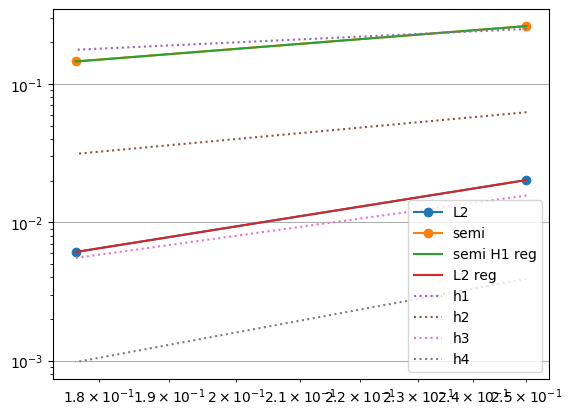

In [258]:
#plt.loglog(h, H1, marker='o', label='H1')
plt.loglog(h, L2, marker='o', label='L2')
plt.loglog(h, semi, marker='o', label='semi')
plt.loglog(h, 10**log10_semi_H1_fit,label='semi H1 reg')
plt.loglog(h, 10**log10_L2_fit,label='L2 reg ')
plt.loglog(h, h, linestyle=':', label='h1')
plt.loglog(h, h*h, linestyle=':', label='h2')
plt.loglog(h, h*h*h, linestyle=':', label='h3')
plt.loglog(h, h*h*h*h, linestyle=':', label='h4')
plt.grid()
plt.legend()

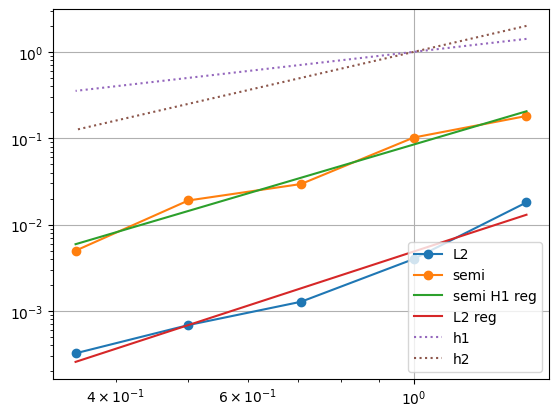

In [252]:
#plt.loglog(h, H1, marker='o', label='H1')
h = 4*h
plt.loglog(h, L2, marker='o', label='L2')
plt.loglog(h, semi, marker='o', label='semi')
plt.loglog(h, 10**log10_semi_H1_fit,label='semi H1 reg')
plt.loglog(h, 10**log10_L2_fit,label='L2 reg ')
plt.loglog(h, h, linestyle=':', label='h1')
plt.loglog(h, h*h, linestyle=':', label='h2')
plt.loglog(h, h*h*h, linestyle=':', label='h3')
plt.loglog(h, h*h*h*h, linestyle=':', label='h4')
plt.grid()
plt.legend()